In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

### Exploring Interactions

#### In our first model, there seemed to be a slight advantage for polynomial transformation, but we couldn't be too sure as it varied between the validation and test sets. Let's explore the interactions between variables and see if we can selectively create a polynomial transformation for a few features.

In [3]:
interaction_df = pd.read_pickle('six_figure_df.pickle')

In [4]:
interaction_df.head()

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13,res
0,391683624,24166110,66,4,0,0,0,0,1,0,0,1,0,0,0,0,1,2.257940e+08
1,187700000,8571785,61,4,0,0,0,0,1,0,0,0,0,1,0,0,0,1.358746e+08
2,301219864,20130142,55,3,0,1,0,0,0,0,0,1,0,0,0,0,1,1.082577e+08
3,289393001,18469620,64,4,0,0,0,0,1,0,0,1,0,0,0,0,1,1.437981e+08
4,198923741,9889780,68,13,0,0,0,0,1,0,0,0,0,1,1,0,0,3.280654e+08


In [5]:
interaction_df.corr()

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13,res
Foreign_Gross,1.000000,0.740643,0.200143,-0.226496,0.051877,0.301410,-0.045688,0.016436,-0.043389,0.239547,0.029926,0.188035,0.173946,-0.250315,0.014183,0.048465,0.128086,0.624334
domestic_opening_gross,0.740643,1.000000,0.127964,-0.156264,-0.000723,0.319546,-0.052836,-0.055284,-0.014876,0.271061,0.029767,0.241037,0.057343,-0.191344,0.009913,-0.037017,0.177789,0.285407
foreign_market_count,0.200143,0.127964,1.000000,-0.312552,0.037038,0.079782,0.231315,0.165518,0.050718,-0.097420,-0.193342,0.114829,0.049171,-0.110816,-0.022100,0.072518,0.060770,0.081884
Years_Since_Release,-0.226496,-0.156264,-0.312552,1.000000,0.016863,-0.102515,-0.008062,-0.007303,-0.028254,-0.059197,-0.041557,-0.100198,-0.052548,0.170545,0.033672,-0.031425,0.026276,-0.121255
Is_Adaptation,0.051877,-0.000723,0.037038,0.016863,1.000000,0.006692,-0.019854,0.036545,-0.068669,-0.022465,0.022126,0.006552,0.118368,-0.099560,-0.020156,0.096277,-0.002662,0.040158
Is_Sequel,0.301410,0.319546,0.079782,-0.102515,0.006692,1.000000,-0.009613,0.055665,-0.006515,0.003101,-0.030241,0.235181,0.024480,-0.148759,0.019248,-0.012726,0.060326,0.146979
Sony Pictures Entertainment (SPE),-0.045688,-0.052836,0.231315,-0.008062,-0.019854,-0.009613,1.000000,-0.152314,-0.151579,-0.148622,-0.170276,0.028677,-0.029177,0.011534,-0.050087,0.016977,0.054888,-0.026048
Twentieth Century Fox,0.016436,-0.055284,0.165518,-0.007303,0.036545,0.055665,-0.152314,1.000000,-0.166320,-0.163075,-0.186836,0.018494,0.108742,-0.052655,0.021801,0.099666,-0.010637,0.001498
Universal Pictures,-0.043389,-0.014876,0.050718,-0.028254,-0.068669,-0.006515,-0.151579,-0.166320,1.000000,-0.162288,-0.185934,-0.019170,-0.098463,0.104579,-0.029017,-0.087890,0.019904,0.025984
Walt Disney Studios Motion Pictures,0.239547,0.271061,-0.097420,-0.059197,-0.022465,0.003101,-0.148622,-0.163075,-0.162288,1.000000,-0.182307,-0.020637,0.189624,-0.073905,0.206797,0.239529,-0.075869,0.090682


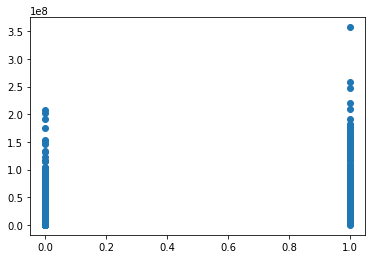

In [44]:
plt.scatter(interaction_df['Is_Sequel'], interaction_df['domestic_opening_gross']);
#definitely seeing a relationship here

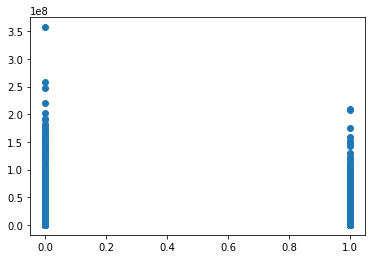

In [45]:
plt.scatter(interaction_df['Is_Adaptation'], interaction_df['domestic_opening_gross']);
#seeing relationship here too

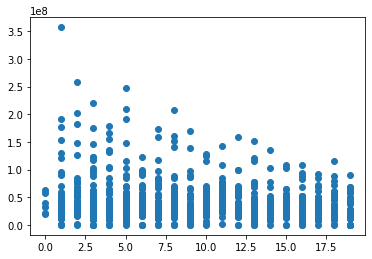

In [46]:
plt.scatter(interaction_df['Years_Since_Release'], interaction_df['domestic_opening_gross']);
#could be slightly polynomial?

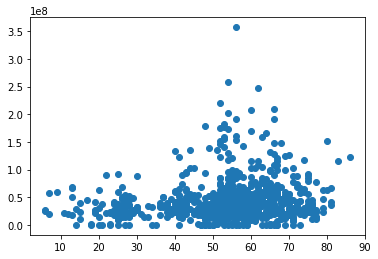

In [47]:
plt.scatter(interaction_df['foreign_market_count'], interaction_df['domestic_opening_gross']);


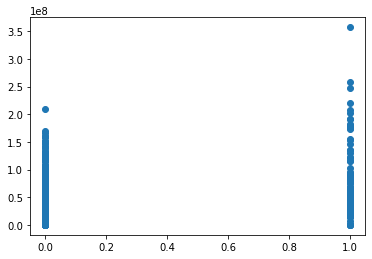

In [48]:
plt.scatter(interaction_df['Walt Disney Studios Motion Pictures'], interaction_df['domestic_opening_gross']);
#seeing relationship here


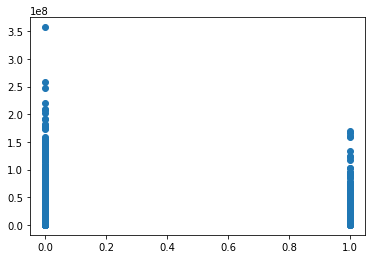

In [49]:
plt.scatter(interaction_df['Warner Bros.'], interaction_df['domestic_opening_gross']);
#seeing relationship here, inverse to Disney above. Same for all other distributors below. 
#Seems like disney is a positive impact on domestic gross


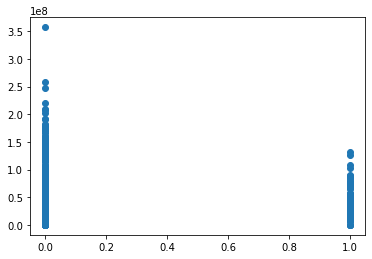

In [50]:
plt.scatter(interaction_df['Twentieth Century Fox'], interaction_df['domestic_opening_gross']);


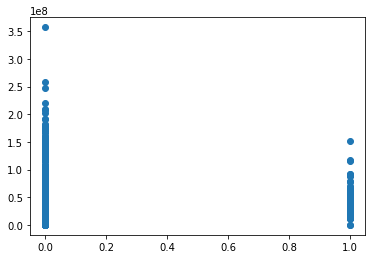

In [51]:
plt.scatter(interaction_df['Sony Pictures Entertainment (SPE)'], interaction_df['domestic_opening_gross']);


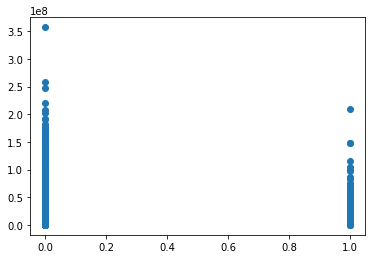

In [52]:
plt.scatter(interaction_df['Universal Pictures'], interaction_df['domestic_opening_gross']);


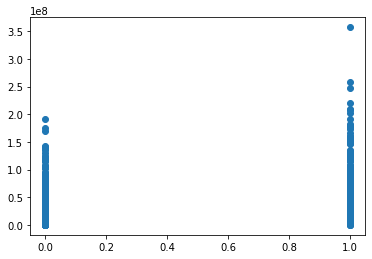

In [53]:
plt.scatter(interaction_df['Action'], interaction_df['domestic_opening_gross']);
#definitely seeing a relationship here

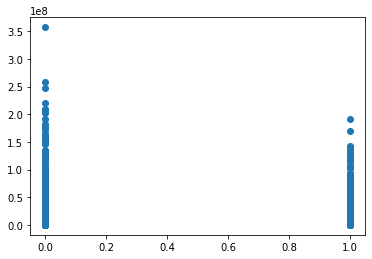

In [54]:
plt.scatter(interaction_df['Adventure'], interaction_df['domestic_opening_gross']);


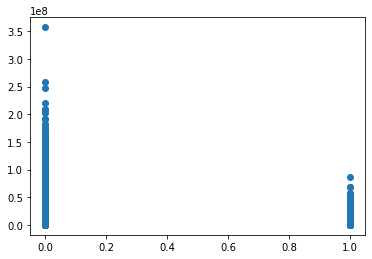

In [55]:
plt.scatter(interaction_df['Comedy'], interaction_df['domestic_opening_gross']);
#definitely seeing a relationship here

In [56]:
interaction_df['Comedy_X_Opening'] = interaction_df['Comedy']*interaction_df['domestic_opening_gross']

In [60]:
interaction_df['Action_X_Opening'] = interaction_df['Action']*interaction_df['domestic_opening_gross']

In [58]:
interaction_df['Disney_X_Opening'] = interaction_df['Walt Disney Studios Motion Pictures']*interaction_df['domestic_opening_gross']

In [59]:
interaction_df['Sequel_X_Opening'] = interaction_df['Is_Sequel']*interaction_df['domestic_opening_gross']

In [80]:
interaction_df['Adaptation_X_Opening'] = interaction_df['Is_Adaptation']*interaction_df['domestic_opening_gross']

In [64]:
#deleting residuals 
del interaction_df['res']


In [81]:
interaction_df.head()

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,...,Adventure,Comedy,G,PG,PG-13,Comedy_X_Opening,Action_X_Opening,Disney_X_Opening,Sequel_X_Opening,Adaptation_X_Opening
0,391683624,24166110,66,4,0,0,0,0,1,0,...,0,0,0,0,1,0,24166110,0,0,0
1,187700000,8571785,61,4,0,0,0,0,1,0,...,0,1,0,0,0,8571785,0,0,0,0
2,301219864,20130142,55,3,0,1,0,0,0,0,...,0,0,0,0,1,0,20130142,0,20130142,0
3,289393001,18469620,64,4,0,0,0,0,1,0,...,0,0,0,0,1,0,18469620,0,0,0
4,198923741,9889780,68,13,0,0,0,0,1,0,...,0,1,1,0,0,9889780,0,0,0,0


In [104]:
X, y = interaction_df.drop('Foreign_Gross',axis=1), interaction_df['Foreign_Gross']
#leave out 20% for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)

In [105]:
from sklearn.model_selection import cross_validate

def cv_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(X.columns, final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')

In [106]:
cv_results(X, y)

Test r2 :               Mean = 0.5726	Range = (0.3476, 0.7086)
Train/Test r2 Ratio :   Mean = 1.1769	Range = (0.8415, 1.8655)

Best Model Feature coefficient results:
domestic_opening_gross: 3.08
foreign_market_count: 1159696.22
Years_Since_Release: -2879988.54
Is_Adaptation:   -13034555.58
Is_Sequel:       -20224353.57
Sony Pictures Entertainment (SPE): 7243295.90
Twentieth Century Fox: 38301981.25
Universal Pictures: 22045485.29
Walt Disney Studios Motion Pictures: 13851937.04
Warner Bros.:    30742245.69
Action:          14328190.78
Adventure:       54381574.11
Comedy:          48302818.44
G:               16501583.18
PG:              15594924.30
PG-13:           19949413.18
Comedy_X_Opening: -2.95
Action_X_Opening: -0.23
Disney_X_Opening: 0.28
Sequel_X_Opening: 1.15
Adaptation_X_Opening: 0.39
Years_Since_Rlease_SQRT: 1234767.23


#### We're overfitting a bit here. let's see what happens if we drop some of the columns related to the ones we've built multiplicative interactions for

In [72]:
interaction_2 = interaction_df.copy()

In [74]:
del interaction_2['Sony Pictures Entertainment (SPE)']
del interaction_2['Twentieth Century Fox']
del interaction_2['Universal Pictures']
del interaction_2['Warner Bros.']
del interaction_2['Adventure']

In [107]:
X_2, y_2 = interaction_2.drop('Foreign_Gross',axis=1), interaction_2['Foreign_Gross']
#leave out 20% for testing
X_2, X_test_2, y_2, y_test_2 = train_test_split(X, y, test_size=.2, random_state=7)

In [108]:
cv_results(X_2, y_2)

Test r2 :               Mean = 0.5506	Range = (0.2653, 0.7307)
Train/Test r2 Ratio :   Mean = 1.2449	Range = (0.7161, 2.5635)

Best Model Feature coefficient results:
domestic_opening_gross: 2.77
foreign_market_count: 1310171.47
Years_Since_Release: -5685858.43
Is_Adaptation:   -42527039.08
Is_Sequel:       -21204329.74
Sony Pictures Entertainment (SPE): -7548296.22
Twentieth Century Fox: 48771735.34
Universal Pictures: -1425441.45
Walt Disney Studios Motion Pictures: 47746997.48
Warner Bros.:    31923384.56
Action:          15953303.92
Adventure:       53103800.94
Comedy:          27995265.42
G:               -17181707.44
PG:              6163220.60
PG-13:           17384569.42
Comedy_X_Opening: -2.33
Action_X_Opening: -0.02
Disney_X_Opening: -0.01
Sequel_X_Opening: 1.00
Adaptation_X_Opening: 1.27
Years_Since_Rlease_SQRT: 19725470.09


####  Unfortunately not helpful

#### Going back to the original model, we did see a slight polynomial trend with Years_Since_Release. Will transforming that help?

In [95]:
interaction_df

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,...,Adventure,Comedy,G,PG,PG-13,Comedy_X_Opening,Action_X_Opening,Disney_X_Opening,Sequel_X_Opening,Adaptation_X_Opening
0,391683624,24166110,66,4,0,0,0,0,1,0,...,0,0,0,0,1,0,24166110,0,0,0
1,187700000,8571785,61,4,0,0,0,0,1,0,...,0,1,0,0,0,8571785,0,0,0,0
2,301219864,20130142,55,3,0,1,0,0,0,0,...,0,0,0,0,1,0,20130142,0,20130142,0
3,289393001,18469620,64,4,0,0,0,0,1,0,...,0,0,0,0,1,0,18469620,0,0,0
4,198923741,9889780,68,13,0,0,0,0,1,0,...,0,1,1,0,0,9889780,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,33347096,47606480,52,15,0,0,0,0,0,0,...,0,1,0,0,1,47606480,0,0,0,0
843,53248834,34119372,33,11,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
844,19530702,41516170,19,6,0,0,0,0,1,0,...,0,0,0,0,1,0,41516170,0,0,0
845,179067330,143818,47,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [97]:
interaction_df['Years_Since_Rlease_SQRT'] = np.sqrt(interaction_df['Years_Since_Release'])

In [102]:
X, y = interaction_df.drop('Foreign_Gross',axis=1), interaction_df['Foreign_Gross']
#leave out 20% for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [103]:
cv_results(X, y)

Test r2 :               Mean = 0.6019	Range = (0.4175, 0.7136)
Train/Test r2 Ratio :   Mean = 1.0982	Range = (0.8424, 1.6695)

Best Model Feature coefficient results:
domestic_opening_gross: 2.97
foreign_market_count: 1220157.63
Years_Since_Release: -4601507.27
Is_Adaptation:   -15942601.11
Is_Sequel:       7966877.25
Sony Pictures Entertainment (SPE): 1953844.58
Twentieth Century Fox: 37700959.24
Universal Pictures: -8043413.58
Walt Disney Studios Motion Pictures: -11912839.95
Warner Bros.:    30198194.99
Action:          14376716.50
Adventure:       60309795.78
Comedy:          27743915.80
G:               -1184305.85
PG:              9647831.89
PG-13:           37189844.63
Comedy_X_Opening: -2.70
Action_X_Opening: -0.27
Disney_X_Opening: 0.82
Sequel_X_Opening: 0.84
Adaptation_X_Opening: 0.64
Years_Since_Rlease_SQRT: 15477119.81


#### This polynomial transformation hasn't made a difference either